In [1]:
import h5py # might need to pip install h5py

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import os
import glob
import re
from scipy.interpolate import make_interp_spline

In [93]:
# Open .h5 files using h5py, mode = readonly
NIL = h5py.File(r'C:\Users\ChemeGrad2020\Massachusetts Institute of Technology\GallowayLab - Documents\projects\consortia\2021.04.18_KTR-Timelapse\btrack_results\XY07\tracks_cp.h5','r')
NILDDRR = h5py.File(r'C:\Users\ChemeGrad2020\Massachusetts Institute of Technology\GallowayLab - Documents\projects\consortia\2021.04.18_KTR-Timelapse\btrack_results\XY09\tracks_cp.h5','r')

# Set figure style
figuresize = [9, 7]
sns.set_palette("deep")

fig_dir = 'C:/Users/ChemeGrad2020/OneDrive - Massachusetts Institute of Technology/Galloway_Lab/2021.04.18-Timelapse-CellBaum_Data/figs/'

In [94]:
# ATTEMPT to plot some trajectories over time - only choose data that starts at 1 and ends at 12

# Number of trajectories to plot
n = 400

# Initialize the size of intensity matrix, rows are cells, columns are time points
intensity_mat = np.zeros((n+1,12,2))

# Initialize the data frame that will be used to generate violin plot
intensity_df = pd.DataFrame({'Condition':[],'Time [hr]':[],'Nuclear KTR Intensity':[]})

# Generate time vector
time_vect = np.arange(0,12)


for condition in range(2):
# Loop over both conditions (NIL and NILDDRR)
    #plt.figure(condition, figsize=(9,6))
    if condition == 0:
        c = NIL
        condition_title = ['NIL']*12
        #condition_title = 'NIL'
        #plt.title('NIL')
    elif condition == 1:
        c = NILDDRR
        condition_title = ['NILDDRR']*12
        #plt.title('NILDDRR')

    # Count the number of trajectories (traj) plotted and while loop iterations (i)
    traj = 0
    i = 0
    # Loop through data until I plot n trajectories
    while traj < n:
        
        # Break the while loop if there are too many iterations
        
        if i > 5*n:
            break
        i = i + 1

        # record where the track begins and ends according to the map
        track_begin = c["tracks/obj_type_1/map"][i,0]
        track_end = c["tracks/obj_type_1/map"][i,1]


        # Only want tracks that go all the way from 1 to 12
        if (track_end-track_begin >= 12):
            
            # Initialize vectors by when object "Begins" and "Ends" in LBEPR
            time_begin = c["tracks/obj_type_1/LBEPR"][i,1]
            time_end = c["tracks/obj_type_1/LBEPR"][i,2]
            track_length = time_end - time_begin + 1
            intensity_vect = np.zeros(track_length)
            k = 0

            # Loop over each track number
            for j in np.arange(track_begin,track_end):
                # Find the mean intensity in the blue channel, unless it is for a "dummy" object
                if c["tracks/obj_type_1/tracks"][j] >= 0:

                    # Record Cell Profiler object number recorded in tracks
                    cp_object = int(c["tracks/obj_type_1/tracks"][j])

                    # Record the blue intensity corresponding to the object number
                    #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_MeanIntensity_Blue"][cp_object]
                    #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_MeanIntensity_Red"][cp_object]
                    #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_MeanIntensity_Blue"][cp_object]
                    #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_MedianIntensity_Blue"][cp_object]
                    intensity_vect[k] = c["cp_data/obj_type_1/Intensity_IntegratedIntensity_Blue"][cp_object]
                    #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_IntegratedIntensity_Blue"][cp_object] / c["cp_data/obj_type_1/AreaShape_Area"][cp_object]
                    #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_MeanIntensity_Blue"][cp_object] / c["cp_data/obj_type_1/AreaShape_Area"][cp_object]
                    #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_MeanIntensity_Blue"][cp_object] / c["cp_data/obj_type_1/Intensity_MeanIntensity_Red"][cp_object]
                    #intensity_vect[k] = c["cp_data/obj_type_1/AreaShape_Area"][cp_object]


                # Print 'NaN' instead of zeros for the "dummy" objects
                else:
                    intensity_vect[k] = 'NaN'

                # Update indexing
                k = k+1

            # Mask the NaN cells for plotting (connects the lines instead of leaving a gap at the NaN)
            #mask = np.isfinite(intensity_vect)

            # Plot the trajectories
            #plt.plot(time_vect[mask],intensity_vect[mask])
            #plt.xlabel("Time (hours)")
            #plt.ylabel("Nuclear ErkKTR Intensity")

            # Store intensity values in a matrix [n x 12]
            intensity_mat[traj, :, condition] = intensity_vect
            traj = traj + 1
            
            running_df = pd.DataFrame({'Condition':condition_title,'Time':time_vect,'Nuclear KTR Intensity':intensity_vect})
            intensity_df = intensity_df.append(running_df)

    # Calculate and plot the mean and standard deviation of the saved trajectories, ignoring NaN

    int_mean = np.nanmean(intensity_mat[:,:,condition].astype('float64'),axis=0)
    int_std = np.nanstd(intensity_mat[:,:,condition],axis=0)
    if condition == 0:
        NIL_int_mean = 15-int_mean
        NIL_int_std = int_std
    elif condition == 1:
        NILDDRR_int_mean = 15-int_mean
        NILDDRR_int_std = int_std
    """
    plt.figure(3, figsize=figuresize)
    plt.plot(time_vect,int_mean)
    plt.fill_between(time_vect, int_mean-int_std, int_mean+int_std, alpha=0.2)
    plt.xlabel("Time (hours)")
    #plt.ylabel("Mean Nuclear KTR Intensity")
    #plt.ylabel("Integrated Nuclear KTR Intensity")
    plt.ylabel("Nuclear Area")
    plt.title("Mean and Std, n = " + str(n))
    """


print(NIL_int_mean)
print(NIL_int_std)
print(NILDDRR_int_mean)
print(NILDDRR_int_std)

[12.7666719  12.74955427 12.69370655 12.43430831 11.97640549 11.71999844
 11.51251215 11.32818    11.66367233 11.71985909 11.81229203 12.06879071]
[1.80975171 1.71192408 1.77441639 2.13997761 2.41342619 2.8578554
 3.07171622 3.25401922 2.84584766 3.0768662  2.90827554 2.55142242]
[13.36963182 13.38647284 13.45360945 13.30952172 13.03838413 12.94301234
 12.86051976 12.93744019 13.00881009 13.02108854 13.1579509  13.25813859]
[1.18534053 1.2249067  1.15003087 1.28019537 1.52727053 1.59122297
 1.72951157 1.58726843 1.61278042 1.57113755 1.53267817 1.36011809]


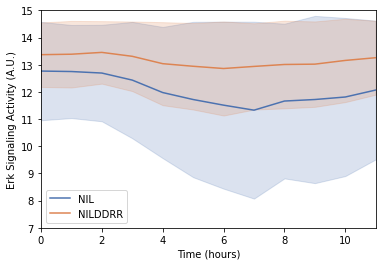

In [95]:
plt.figure(3, figsize=[6,4])

plt.plot(time_vect,NIL_int_mean,color='#4c72b0')
plt.plot(time_vect,NILDDRR_int_mean,color='#dd8452')
plt.legend(["NIL","NILDDRR"],loc='lower left')

plt.fill_between(time_vect, NIL_int_mean-NIL_int_std, NIL_int_mean+NIL_int_std, alpha=0.2,color='#4c72b0')
plt.fill_between(time_vect, NILDDRR_int_mean-NILDDRR_int_std, NILDDRR_int_mean+NILDDRR_int_std, alpha=0.2,color='#dd8452')

plt.xlabel("Time (hours)")
plt.ylabel("Erk Signaling Activity (A.U.)")
plt.xlim([0,11])
plt.ylim([7,15])

savetitle = 'Mean-Std-plot-integrated_XY0709_small'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)


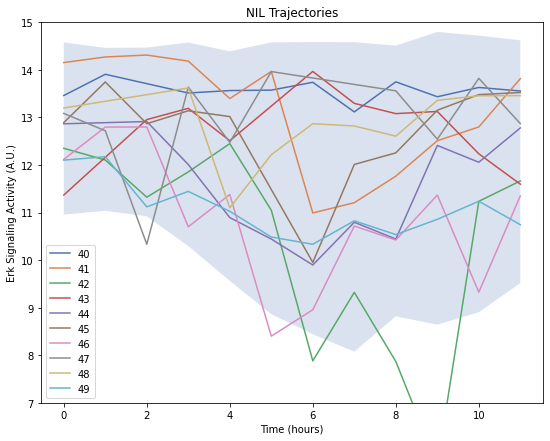

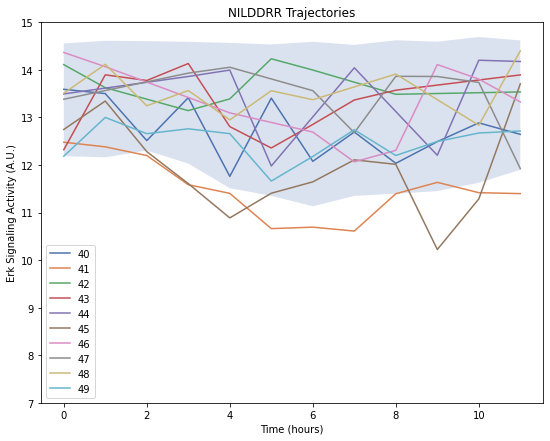

In [96]:
# Plot some example trajectories from the saved values

NIL_traj = np.arange(40,50)
NILDDRR_traj = np.arange(40,50)

plt.figure(figsize=figuresize)
for i in NIL_traj:
    traj_vect = 15-intensity_mat[i,:,0]
    mask = np.isfinite(traj_vect)
    plt.plot(time_vect[mask],traj_vect[mask])
plt.fill_between(time_vect, NIL_int_mean-NIL_int_std, NIL_int_mean+NIL_int_std, alpha=0.2)
plt.xlabel("Time (hours)")
plt.ylabel("Erk Signaling Activity (A.U.)")
plt.title("NIL Trajectories")
plt.legend(NIL_traj)
plt.ylim([7,15])
savetitle = 'NIL_sample_traj_intblue_XY0708'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)




plt.figure(figsize=figuresize)
for i in NILDDRR_traj:
    traj_vect = 15-intensity_mat[i,:,1]
    mask = np.isfinite(traj_vect)
    plt.plot(time_vect[mask],traj_vect[mask])
plt.xlabel("Time (hours)")
#plt.ylabel("Integrated Nuclear KTR Intensity")
plt.fill_between(time_vect, NILDDRR_int_mean-NILDDRR_int_std, NILDDRR_int_mean+NILDDRR_int_std, alpha=0.2)
plt.ylabel("Erk Signaling Activity (A.U.)")
plt.title("NILDDRR Trajectories")
plt.legend(NILDDRR_traj)
plt.ylim([7,15])
savetitle = 'NILDDRR_sample_intblue_area_XY0708'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)





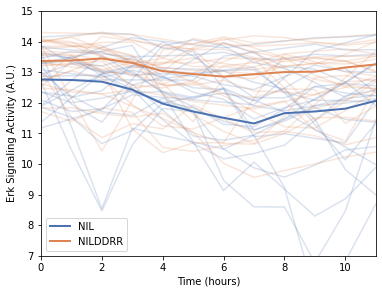

In [97]:
# Plot some example trajectories from the saved values with mean values

NIL_traj =     [1,2,3,4,10,18,21,23,26,27,28,30,32,33,34,35,36,40,41,42,43,44,50,51,98] # 25 total
NILDDRR_traj = [1,2,3,4,12,13,19,17,21,23,26,28,29,30,31,32,33,34,40,41,42,45,51,52,88] # 25 total


plt.figure(figsize=[6,4.5])

plt.plot(time_vect,NIL_int_mean,color='#4c72b0',linewidth=2,zorder=2)
plt.plot(time_vect,NILDDRR_int_mean,color='#dd8452',linewidth=2,zorder=2)
plt.legend(["NIL","NILDDRR"],loc='best')


df = pd.DataFrame()
for i in NIL_traj:
    df2 = pd.DataFrame()
    traj_vect = 15-intensity_mat[i,:,0]
    mask = np.isfinite(traj_vect)
    df2['Time'] = time_vect
    df2['Traj_Num'] = [i]*12
    df2['Traj'] = traj_vect
    df2['Condition'] = ['NIL']*12
    df2['Mask'] = mask
    df2['Rolling Average'] = df2.Traj.rolling(2,min_periods=1).mean()
    df.append(df2)
    #plt.plot(time_vect[mask],traj_vect[mask],'#4c72b0')
    plt.plot(df2['Time'][df2['Mask']],df2['Rolling Average'][df2['Mask']],'#4c72b0',alpha=0.2,zorder=1)
for i in NILDDRR_traj:
    traj_vect = 15-intensity_mat[i,:,1]
    mask = np.isfinite(traj_vect)
    df2['Time'] = time_vect
    df2['Traj_Num'] = [i]*12
    df2['Traj'] = traj_vect
    df2['Condition'] = ['NILDDRR']*12
    df2['Mask'] = mask
    df2['Rolling Average'] = df2.Traj.rolling(2,min_periods=1).mean()
    df.append(df2)
    plt.plot(df2['Time'][df2['Mask']],df2['Rolling Average'][df2['Mask']],'#dd8452',alpha=0.2,zorder=1)
    #plt.plot(time_vect[mask],traj_vect[mask],'#dd8452')


plt.xlabel("Time (hours)")
plt.ylabel("Erk Signaling Activity (A.U.)")
plt.xlim([0,11])
plt.ylim([7,15])

savetitle = 'sample_traj_intblue_XY0708'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)

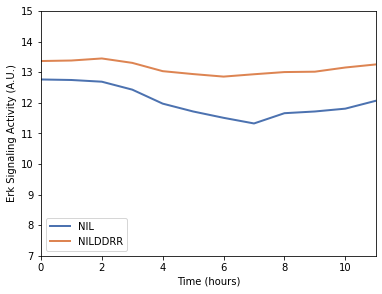

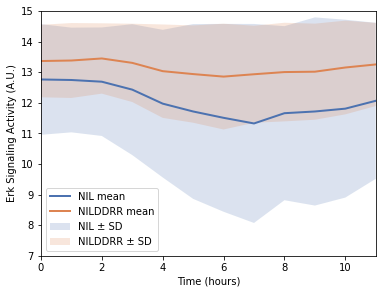

In [98]:
# Plot mean only for each condition
plt.figure(figsize=[6,4.5])
plt.plot(time_vect,NIL_int_mean,color='#4c72b0',linewidth=2,zorder=2)
plt.plot(time_vect,NILDDRR_int_mean,color='#dd8452',linewidth=2,zorder=2)
plt.legend(["NIL","NILDDRR"],loc='lower left')

plt.xlabel("Time (hours)")
plt.ylabel("Erk Signaling Activity (A.U.)")
plt.xlim([0,11])
plt.ylim([7,15])

savetitle = 'mean-only_intblue_XY0708'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)




# Plot mean and SD for each condition
plt.figure(figsize=[6,4.5])
plt.plot(time_vect,NIL_int_mean,color='#4c72b0',linewidth=2,zorder=2)
plt.plot(time_vect,NILDDRR_int_mean,color='#dd8452',linewidth=2,zorder=2)
#plt.legend(["NIL","NILDDRR"],loc='lower left')
plt.fill_between(time_vect, NIL_int_mean-NIL_int_std, NIL_int_mean+NIL_int_std, alpha=0.2,zorder=1)
plt.fill_between(time_vect, NILDDRR_int_mean-NILDDRR_int_std, NILDDRR_int_mean+NILDDRR_int_std, alpha=0.2,zorder=1)
plt.legend(["NIL mean","NILDDRR mean",'NIL ± SD','NILDDRR ± SD'],loc='lower left')



plt.xlabel("Time (hours)")
plt.ylabel("Erk Signaling Activity (A.U.)")
plt.xlim([0,11])
plt.ylim([7,15])

savetitle = 'mean_SD_intblue_XY0708'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)

Ttest_indResult(statistic=6.276451995382747, pvalue=5.724283572236259e-10)
Ttest_indResult(statistic=6.325510741905328, pvalue=4.5784819885375967e-10)
Ttest_indResult(statistic=-1.5460108105819825, pvalue=0.12255617008960322)
Ttest_indResult(statistic=-0.2711502274771739, pvalue=0.7863571282778681)


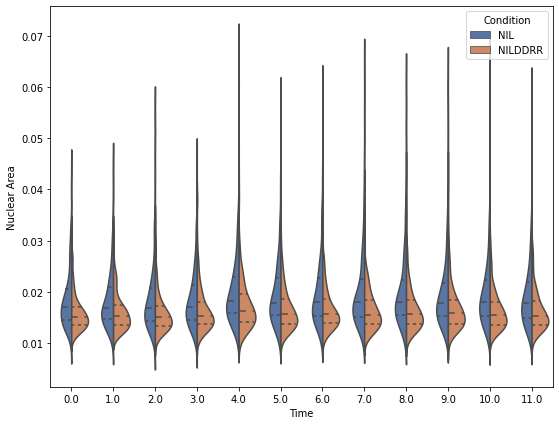

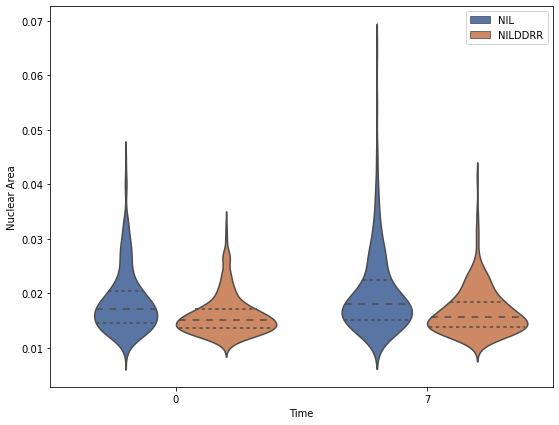

In [162]:
# Creat violin plots at each time point (or at least at just 0 and 7)

# Plot all time points with conditions split
plt.figure(figsize=figuresize)
sns.violinplot(x="Time", hue = "Condition", y = "Nuclear KTR Intensity", data=intensity_df, split=True, inner="quartile")
plt.ylabel('Nuclear Area')
savetitle = 'violin_all_time_area_XY1415'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)


# Plot just time points 0 and 7
plt.figure(figsize=figuresize)
sns.violinplot(x="Time", hue = "Condition", y = "Nuclear KTR Intensity", data=intensity_df, order= [0, 7], inner="quartile")
plt.ylabel('Nuclear Area')
plt.legend(loc='upper right')



# Complete T-test for the means of two independent samples
stat_c1c2_t0 = stats.ttest_ind(intensity_mat[:,0,0], intensity_mat[:,0,1], equal_var=False, nan_policy='omit') # Time 0, NIL vs. NILDDRR
print(stat_c1c2_t0)

# Insert significance markers onto plot - Time 0, NIL vs. NILDDRR
x1 = -0.2
x2 = 0.2
y = 0.075
h = 0.002
#plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw=1.5, color='k')
#plt.text((x1+x2)*0.5, y+h, "***", ha='center', va='bottom', color='k')

# Repeat
stat_c1c2_t7 = stats.ttest_ind(intensity_mat[:,7,0], intensity_mat[:,7,1], equal_var=False, nan_policy='omit') # Time 7, NIL vs. NILDDRR
print(stat_c1c2_t7)
x1 = 0.8
x2 = 1.2
y = 0.075
h = 0.002
#plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw=1.5, color='k')
#plt.text((x1+x2)*0.5, y+h, "***", ha='center', va='bottom', color='k')


stat_c1_t0t7 = stats.ttest_ind(intensity_mat[:,0,0], intensity_mat[:,7,0], equal_var=False, nan_policy='omit') # NIL, time 0 vs. time 7
print(stat_c1_t0t7)
x1 = -0.2
x2 = 0.8
y = 0.085
h = 0.002
#plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw=1.5, color='k')
#plt.text((x1+x2)*0.5, y+h, "*", ha='center', va='bottom', color='k')


stat_c2_t0t7 = stats.ttest_ind(intensity_mat[:,0,1], intensity_mat[:,7,1], equal_var=False, nan_policy='omit') # NILDDRR, time 0 vs. time 7
print(stat_c2_t0t7)
x1 = 0.2
x2 = 1.2
y = 0.08
h = 0.002
#plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw=1.5, color='k')
#plt.text((x1+x2)*0.5, y+h, "*", ha='center', va='bottom', color='k')

savetitle = 'violin_07_area_XY1415'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)

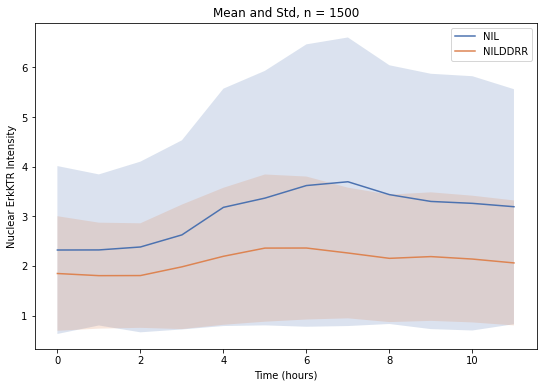

In [172]:
# Plot all data - don't sort by when the object's first or last appearance

# Number of trajectories to plot
n = 1500
# Initialize the size of intensity matrix
intensity_mat = np.zeros((n+1,12,2))

# Initialize the data frame that will be used to generate violin plot
intensity_df2 = pd.DataFrame({'Condition':[],'Time [hr]':[],'Nuclear KTR Intensity':[]})

for condition in range(2):
# Loop over both conditions (NIL and NILDDRR)
    #plt.figure(condition, figsize=(9,6))
    if condition == 0:
        c = NIL
        condition_title = ['NIL','NIL','NIL','NIL','NIL','NIL','NIL','NIL','NIL','NIL','NIL','NIL']
    #    plt.title('NIL')
    elif condition == 1:
        c = NILDDRR
        condition_title = ['NILDDRR','NILDDRR','NILDDRR','NILDDRR','NILDDRR','NILDDRR','NILDDRR','NILDDRR','NILDDRR','NILDDRR','NILDDRR','NILDDRR']
    #    plt.title('NILDDRR')

    # Count the number of trajectories plotted
    traj = -1
    i = -1

    # loop over each track that I want to plot
    while traj < n:
        
        # Break the while loop if there are too many iterations
        i = i + 1
        if i > 5*n:
            break

        # Initialize vectors by when object "Begins" and "Ends" in LBEPR
        track_begin = c["tracks/obj_type_1/map"][i,0]
        track_end = c["tracks/obj_type_1/map"][i,1]

        time_begin = c["tracks/obj_type_1/LBEPR"][i,1]
        time_end = c["tracks/obj_type_1/LBEPR"][i,2]

        intensity_vect = np.empty(12)
        intensity_vect.fill(np.nan)
        time_vect = np.arange(0,12)
        k = time_begin - 1
        # Loop over each track number
        for j in np.arange(track_begin,track_end):
            # If the track number is negative "dummy" object, skip finding the intensity
            # Otherwise, find the mean intensity in the blue channel
            if c["tracks/obj_type_1/tracks"][j] >= 0:

                # Record Cell Profiler object number recorded in tracks
                cp_object = int(c["tracks/obj_type_1/tracks"][j])

                # Record the blue intensity corresponding to the object number
                i#ntensity_vect[k] = c["cp_data/obj_type_1/Intensity_MeanIntensity_Blue"][cp_object]
                #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_MeanIntensity_Red"][cp_object]
                intensity_vect[k] = c["cp_data/obj_type_1/Intensity_IntegratedIntensity_Blue"][cp_object]
                #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_IntegratedIntensity_Red"][cp_object]
                #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_IntegratedIntensity_Blue"][cp_object] / c["cp_data/obj_type_1/AreaShape_Area"][cp_object]
                #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_MeanIntensity_Blue"][cp_object] / c["cp_data/obj_type_1/AreaShape_Area"][cp_object]
                #intensity_vect[k] = c["cp_data/obj_type_1/Intensity_MeanIntensity_Blue"][cp_object] / c["cp_data/obj_type_1/Intensity_MeanIntensity_Red"][cp_object]
                #intensity_vect[k] = c["cp_data/obj_type_1/AreaShape_Area"][cp_object]

                # Update indexing
                k = k+1

            # Print 'NaN' instead of zeros for the "dummy" objects
            else:
                #intensity_vect[k] = 'NaN'
                k = k+1

        

        # mask the NaN cells for plotting (connects the lines instead of leaving a gap at the NaN)
        #mask = np.isfinite(intensity_vect)

        # Plot the trajectories
        #plt.plot(time_vect[mask],intensity_vect[mask])
        #plt.xlabel("Time (hours)")
        #plt.ylabel("Nuclear ErkKTR Intensity")

        # Store intensity values in a matrix [12 x n]
        intensity_mat[traj,:,condition] = intensity_vect
        traj = traj + 1

        running_df = pd.DataFrame({'Condition':condition_title,'Time':time_vect,'Nuclear KTR Intensity':intensity_vect})
        intensity_df2 = intensity_df2.append(running_df)

    # Calculate and plot the mean and standard deviation of the saved trajectories, ignoring NaN
    int_mean = np.nanmean(intensity_mat[:,:,condition],axis=0)
    int_std = np.nanstd(intensity_mat[:,:,condition],axis=0)

    plt.figure(3, figsize=(9,6))
    plt.plot(time_vect,int_mean)
    plt.fill_between(time_vect, int_mean-int_std, int_mean+int_std, alpha=0.2)
    plt.xlabel("Time (hours)")
    plt.ylabel("Nuclear ErkKTR Intensity")
    #plt.ylabel('Nuclear Area')
    #plt.ylabel("Nuclear Mask Intensity")
    plt.title("Mean and Std, n = " + str(n))


plt.legend(["NIL","NILDDRR"])
savetitle = 'All-Mean-Std-plot-meanint_XY0709'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)

Ttest_indResult(statistic=7.776852915232279, pvalue=1.2016928975432225e-14)
Ttest_indResult(statistic=11.96283344305003, pvalue=6.663209823294456e-31)
Ttest_indResult(statistic=-11.416392777164614, pvalue=1.710737709496114e-28)
Ttest_indResult(statistic=-6.899540794263638, pvalue=8.087616813984878e-12)


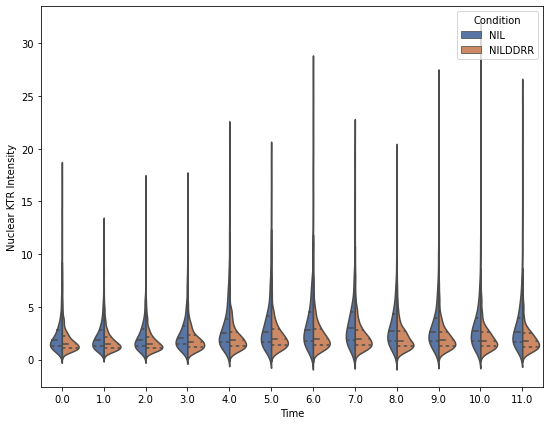

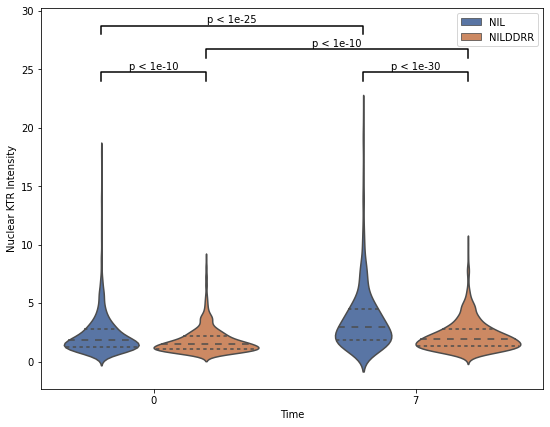

In [184]:
# Re-do violin plots -- these might be more accurate?

# Plot all time points with conditions split
plt.figure(figsize=figuresize)
sns.violinplot(x="Time", hue = "Condition", y = "Nuclear KTR Intensity", data=intensity_df2, split=True, inner="quartile")
#plt.ylabel('Nuclear Area')
#plt.ylabel('Nuclear Mask Intensity')
savetitle = 'All-violin_all_time_intint_XY0709'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)


# Plot just time points 0 and 7
plt.figure(figsize=figuresize)
sns.violinplot(x="Time", hue = "Condition", y = "Nuclear KTR Intensity", data=intensity_df2, order= [0, 7], inner="quartile")
#plt.ylabel('Nuclear Area')
#plt.ylabel('Nuclear Mask Intensity')
plt.legend(loc='upper right')




# Complete T-test for the means of two independent samples
stat_c1c2_t0 = stats.ttest_ind(intensity_mat[:,0,0], intensity_mat[:,0,1], equal_var=False, nan_policy='omit') # Time 0, NIL vs. NILDDRR
print(stat_c1c2_t0)

# Insert significance markers onto plot - Time 0, NIL vs. NILDDRR
x1 = -0.2
x2 = 0.2
#y = 0.075
#h = 0.002
y = 24
h = 0.75
plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw=1.5, color='k')
plt.text((x1+x2)*0.5, y+h+0.05, "p < 1e-10", ha='center', va='bottom', color='k')


# Repeat
stat_c1c2_t7 = stats.ttest_ind(intensity_mat[:,7,0], intensity_mat[:,7,1], equal_var=False, nan_policy='omit') # Time 7, NIL vs. NILDDRR
print(stat_c1c2_t7)
x1 = 0.8
x2 = 1.2
#y = 0.075
#h = 0.002
plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw=1.5, color='k')
plt.text((x1+x2)*0.5, y+h+0.05, "p < 1e-30", ha='center', va='bottom', color='k')


stat_c1_t0t7 = stats.ttest_ind(intensity_mat[:,0,0], intensity_mat[:,7,0], equal_var=False, nan_policy='omit') # NIL, time 0 vs. time 7
print(stat_c1_t0t7)
x1 = -0.2
x2 = 0.8
#y = 0.085
#h = 0.002
y = 28
plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw=1.5, color='k')
plt.text((x1+x2)*0.5, y+h+0.05, "p < 1e-25", ha='center', va='bottom', color='k')


stat_c2_t0t7 = stats.ttest_ind(intensity_mat[:,0,1], intensity_mat[:,7,1], equal_var=False, nan_policy='omit') # NILDDRR, time 0 vs. time 7
print(stat_c2_t0t7)
x1 = 0.2
x2 = 1.2
#y = 0.08
#h = 0.002
y = 26
plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw=1.5, color='k')
plt.text((x1+x2)*0.5, y+h+0.05, "p < 1e-10", ha='center', va='bottom', color='k')

savetitle = 'All-violin_07_intint_XY0709_stats'
plt.savefig(fig_dir + savetitle + '.svg',dpi=300)